<a href="https://colab.research.google.com/github/sRivera23/Proyecto-modelos/blob/main/01%20-%20Primer%20modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocesamiento**

<a target="_blank" href="https://colab.research.google.com/github/daniel-lujan/ml-prediction/blob/main/01%20-%20Preprocesamiento.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()
from local.lib import mlutils

replicating local resources


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

## **Descarga del Dataset original**

Para descargar el dataset a Colab, es necesario subir su Kaggle API Key personal (para crear una nueva, revise la sección Authentication en https://www.kaggle.com/docs/api).

Suba a continuación el archivo `.json` generado.

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c home-credit-default-risk

100% 685M/688M [00:06<00:00, 128MB/s]
100% 688M/688M [00:07<00:00, 103MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/home-credit-default-risk.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Cargar datos de entrenamiento y de prueba
data = pd.read_csv("/content/application_train.csv")
test_data = pd.read_csv("/content/application_test.csv")

In [ ]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## **Rellenado de datos faltantes**

### **Variables continuas**

Primero, reemplazamos los valores faltantes en las columnas numéricas por la media de la columna.

> <font color="blue"><b>Nota:</b></font> Debido al tamaño del dataset y a la cantidad de columnas faltantes, esto puede tardar un poco (7 minutos aproximadamente).

In [ ]:
data = data.fillna(data.mean())
test_data = test_data.fillna(test_data.mean())

### **Variables categóricas**

Luego, rellenamos los datos faltantes en las columnas categóricas con el valor más común encontrado para esa variable.

In [ ]:
def fill_nan_with_mode(column):
    mode = column.mode()[0]
    return column.fillna(mode)

data = data.apply(fill_nan_with_mode, axis=0)
test_data = test_data.apply(fill_nan_with_mode, axis=0)

## **Transformación de variables categóricas a numéricas**

Una vez que no hay datos faltantes en los DataFrame, usamos One-Hot Encoding para transformar las variables categóricas en variables numéricas.

In [ ]:
# Obtenemos las columnas no-numéricas
cat_columns =data.select_dtypes(include=["object"])
cat_columns.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
# Aplicar One-Hot Encoding sobre las columnas categóricas
data_encoded = pd.get_dummies(data, columns=cat_columns.columns)
test_data_encoded = pd.get_dummies(test_data, columns=cat_columns.columns)

# **Primer modelo predictivo**

Antes de entrenar el modelo, es necesario sincronizar la data de entrenamiento y de prueba, ya que debido al preprocesamiento, pueden tener diferentes columnas.

In [ ]:
X_train = data_encoded.drop("TARGET", axis=1)
y_train = data_encoded["TARGET"]

In [ ]:
for col in X_train.columns.difference(test_data_encoded.columns):
    test_data_encoded[col] = [0] * len(test_data_encoded)

test_data_encoded = test_data_encoded[X_train.columns]

Una vez `test_data_encoded` y `X_train` coinciden en columnas, podemos entrenar un modelo.

Para nuestra primera iteración, decidimos utilizar `RandomForestClassifier` con todos sus parámetros por defecto.

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Luego de entrenar el modelo, podemos realizar la predicción con los datos proveídos por la competencia de Kaggle.

In [ ]:
y_pred = model.predict_proba(test_data_encoded)

## **Generación del CSV con los resultados**

In [ ]:
df = pd.DataFrame()

In [ ]:
df["SK_ID_CURR"] = test_data["SK_ID_CURR"]
df["TARGET"] = y_pred[:, 1]
df = df.set_index("SK_ID_CURR")

In [ ]:
df

,TARGET
SK_ID_CURR,
100001,0.11
100005,0.11
100013,0.08
100028,0.06
100038,0.10
...,...
456221,0.08
456222,0.08
456223,0.09


In [ ]:
df.to_csv("results.csv")

Con la predicción obtenida, se consiguió un puntaje de `69.582%`
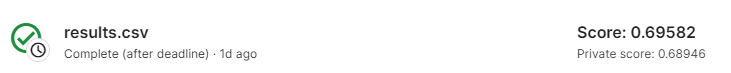

## **Análisis de los resultados**


Lo esperable es que el promedio en las probabilidades obtenidas sea similar al porcentaje de clientes que pagaron dentro del plazo en los datos de entrenamiento (porcentaje de 1s en `data`).

In [ ]:
y_pred[:, 1].mean()

0.08538835548990645

In [ ]:
data["TARGET"].mean()

0.08072881945686496

Efectivamente, se puede observar que `8.54% ~ 8.07%`.

### **Variables más significativas**

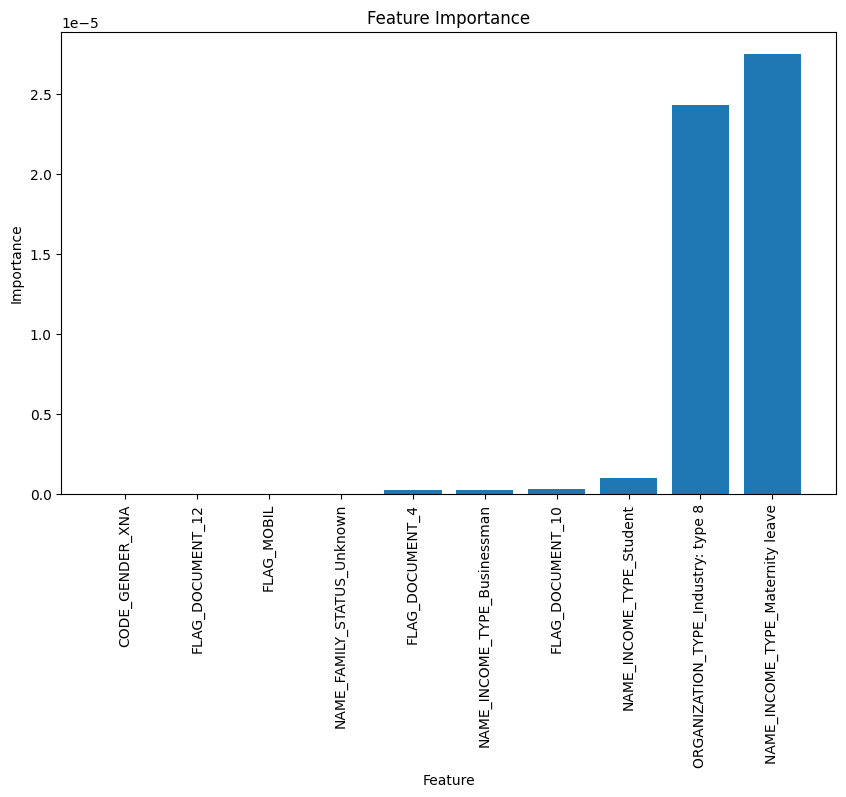

In [ ]:
combined = list(zip(model.feature_importances_, list(X_train.columns)))
combined.sort()

feature_importances, feature_names = zip(*combined)

plt.figure(figsize=(10, 6))
plt.bar(range(10), feature_importances[0:10], tick_label=feature_names[:10])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()